In [39]:
import tensorflow.compat.v1 as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

In [40]:
def normalize(dataset):
    dataset = dataset.apply(lambda x: (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0)))
    dataset = dataset.loc[:,dataset.any()]
    return dataset

In [41]:
dataset = pd.read_csv("CleanningData.csv" , index_col = 0)
dataset = normalize(dataset.iloc[:,:])
# Splitting the dataset into train 70% and test 30%
features = (dataset.shape[1] - 1)
examples = dataset.shape[0]
train_size = int (0.7 * len(dataset))
(x_train , y_train) = (np.array(dataset.iloc[:train_size,:features]), np.array(dataset.iloc[:train_size,features:]))
(x_test , y_test) = (np.array(dataset.iloc[train_size:,:features]), np.array(dataset.iloc[train_size:,features:]))

In [42]:
# hyper parameters 
learning_rate = 0.01
epochs = 5000
batch_size = 100
batches = int (train_size / batch_size)

In [43]:
(hidden1_size, hidden2_size) = (10, 5)
x = tf.placeholder(tf.float32 , [None , features])
y = tf.placeholder(tf.float32 , [None , 1])

W = tf.Variable(tf.zeros([features, 1]))
b = tf.Variable(tf.zeros([1]))


W1 = tf.Variable(tf.truncated_normal([features, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)
W3 = tf.Variable(tf.truncated_normal([hidden2_size, 1], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[1]))

pred = 1 / (1.0 + tf.exp(-z2))
loss = tf.reduce_mean(-(y * tf.log(pred) + (1 - y) * tf.log( 1 - pred)))
update = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted_class = tf.greater(pred,0.5)
correct = tf.equal(predicted_class, tf.equal(y,1.0))
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

loss_trace = []
train_acc = []
test_acc = []

session = tf.Session()
session.run(tf.global_variables_initializer())


for epoch in range(epochs):     
    for row in range(batches): 
        batch_x = x_train [row * batch_size : (row + 1) * batch_size]
        batch_y = y_train [row * batch_size : (row + 1) * batch_size]
        session.run(update ,feed_dict = {x : batch_x , y : batch_y})
        temp_loss , temp_train_acc = session.run ([loss , accuracy] , feed_dict = {x : batch_x , y : batch_y})
        temp_test_acc = session.run(accuracy, feed_dict = {x: x_test, y: y_test})
    
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    if(epoch % 100 == 0):    
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch, temp_loss,temp_train_acc, temp_test_acc))
        if(epoch == 1500):
            break

epoch:    0 loss: 0.692094 train_acc: 0.528000 test_acc: 0.479125
epoch:  100 loss: 0.691948 train_acc: 0.508000 test_acc: 0.489596
epoch:  200 loss: 0.691239 train_acc: 0.516000 test_acc: 0.498211
epoch:  300 loss: 0.690170 train_acc: 0.538000 test_acc: 0.502319
epoch:  400 loss: 0.688481 train_acc: 0.570000 test_acc: 0.506163
epoch:  500 loss: 0.685821 train_acc: 0.576000 test_acc: 0.513983
epoch:  600 loss: 0.681818 train_acc: 0.588000 test_acc: 0.515971
epoch:  700 loss: 0.676503 train_acc: 0.616000 test_acc: 0.526044
epoch:  800 loss: 0.670170 train_acc: 0.626000 test_acc: 0.538370
epoch:  900 loss: 0.662830 train_acc: 0.646000 test_acc: 0.552816
epoch: 1000 loss: 0.654033 train_acc: 0.680000 test_acc: 0.561564
epoch: 1100 loss: 0.643206 train_acc: 0.690000 test_acc: 0.562757
epoch: 1200 loss: 0.630860 train_acc: 0.698000 test_acc: 0.572167
epoch: 1300 loss: 0.617192 train_acc: 0.698000 test_acc: 0.580252
epoch: 1400 loss: 0.601383 train_acc: 0.712000 test_acc: 0.593638
epoch: 150

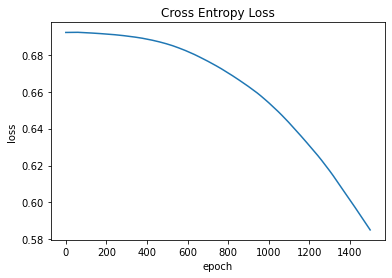

In [44]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

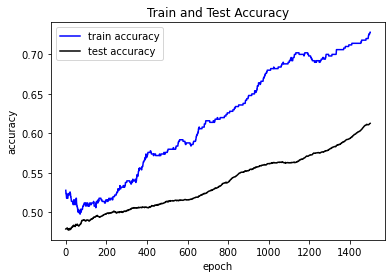

In [45]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()